# Task 1: Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables. 
- What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
s = pd.read_csv('http://bit.ly/w-data')
s

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [17]:
s.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
s.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [19]:
s.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
s.shape

(25, 2)

In [21]:
s.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualisation

C:\Users\Japneet\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


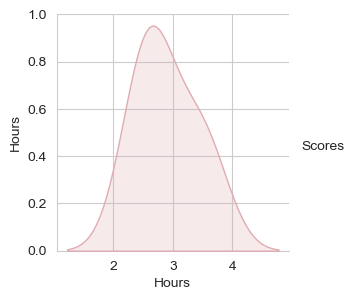

In [23]:
sns.set_style("whitegrid")
sns.pairplot(s,hue="Scores",size=3);
plt.show()

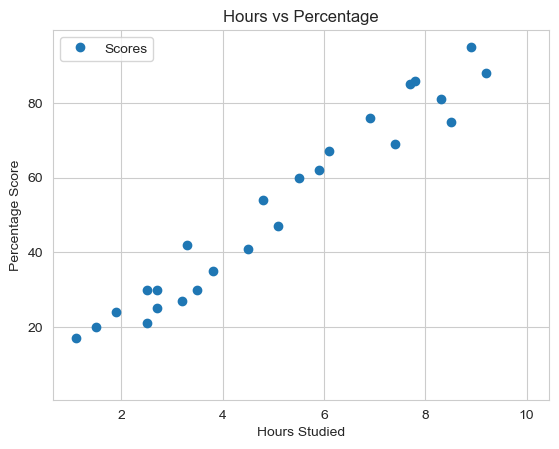

In [33]:
# Plotting the distribution of scores
s.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.plot(10,5)
plt.show()

# Linear Regression

In [36]:
#Independent Features and Dependent Features 
x = s.iloc[:, :-1]
y = s.iloc[:, 1]  

In [38]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [39]:
x_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [40]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [41]:
y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [42]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [44]:
print(x_test)                            # Testing data - In Hours
y_pred = regressor.predict(x_test)       # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [45]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [53]:
print("Accuracy:", regressor.score(x_test,y_test))

Accuracy: 0.9454906892105354


# Making Prediction

In [54]:
hours = float(input())
own_pred = regressor.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No. of Hours = 9.25
Predicted Score = 93.69173248737539


C:\Users\Japneet\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# My Final Conclusion
From the above result we can say that if a studied for 9.25 hours/day then student got 93.69% Marks.